In [30]:
import os
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from scipy import optimize

In [31]:
data = pd.read_csv("./Assignment3/Data/house_data_complete.csv")
data = data.drop(['id', 'date', 'zipcode', 'lat', 'long','sqft_living15', 'sqft_lot15', 'yr_renovated'],axis=1)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987


In [32]:
data.describe() 


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000


Text(0, 0.5, 'Count')

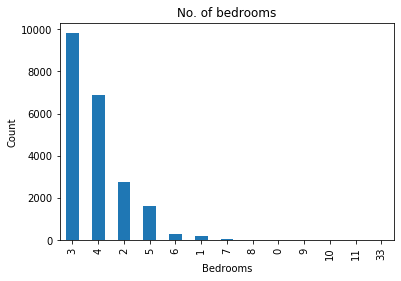

In [33]:
data['bedrooms'].value_counts().plot(kind='bar')
plt.title('No. of bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')

Text(0.5, 1.0, 'Price vs. Square Feet')

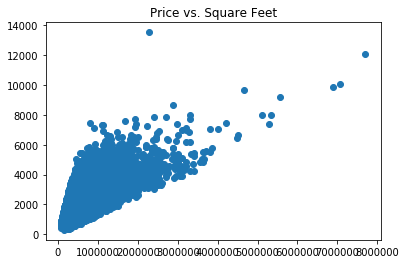

In [34]:
plt.scatter(data.price,data.sqft_living)
plt.title('Price vs. Square Feet')

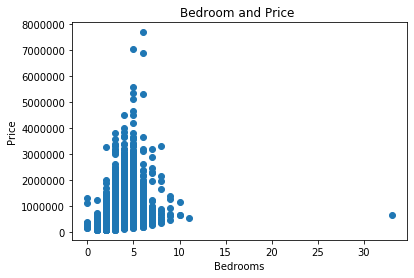

In [35]:
plt.scatter(data.bedrooms,data.price)
plt.title("Bedroom and Price ")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()

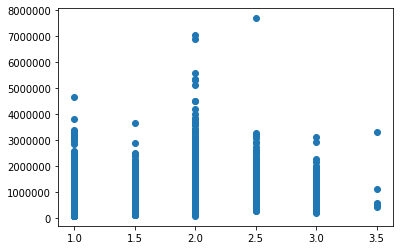

In [36]:
plt.scatter(data.floors,data.price)


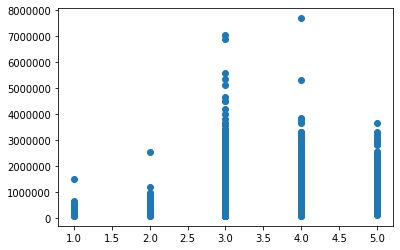

In [37]:
plt.scatter(data.condition,data.price)


In [38]:
def  featureNormalize(X):
    """
    Normalizes the features in X. returns a normalized version of X where
    the mean value of each feature is 0 and the standard deviation
    is 1. This is often a good preprocessing step to do when working with
    learning algorithms.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n).
    
    Returns
    -------
    X_norm : array_like
        The normalized dataset of shape (m x n).
    
    Instructions
    ------------
    First, for each feature dimension, compute the mean of the feature
    and subtract it from the dataset, storing the mean value in mu. 
    Next, compute the  standard deviation of each feature and divide
    each feature by it's standard deviation, storing the standard deviation 
    in sigma. 
    
    Note that X is a matrix where each column is a feature and each row is
    an example. You needto perform the normalization separately for each feature. 
    
    Hint
    ----
    You might find the 'np.mean' and 'np.std' functions useful.
    """
    # You need to set these values correctly
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    
    print(mu.shape)
    print(sigma.shape)
    # =========================== YOUR CODE HERE =====================
    mu = np.mean(X_norm, axis = 0)

    
    sigma = np.std(X_norm , axis = 0)
    X_norm = (X_norm - mu) / sigma
    
    # ================================================================
    return X_norm, mu, sigma

In [39]:
data_norm, mu, sigma = featureNormalize(data)

(13,)
(13,)


In [40]:
print(data_norm)

          price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
0     -0.866717 -0.398737  -1.447464    -0.979835 -0.228321 -0.915427   
1     -0.005688 -0.398737   0.175607     0.533634 -0.189885  0.936506   
2     -0.980849 -1.473959  -1.447464    -1.426254 -0.123298 -0.915427   
3      0.174090  0.676485   1.149449    -0.130550 -0.244014 -0.915427   
4     -0.081958 -0.398737  -0.149007    -0.435422 -0.169653 -0.915427   
...         ...       ...        ...          ...       ...       ...   
21608 -0.490545 -0.398737   0.500221    -0.598746 -0.337424  2.788439   
21609 -0.381588  0.676485   0.500221     0.250539 -0.224386  0.936506   
21610 -0.375865 -1.473959  -1.772078    -1.154047 -0.332137  0.936506   
21611 -0.381588 -0.398737   0.500221    -0.522528 -0.307076  0.936506   
21612 -0.585882 -1.473959  -1.772078    -1.154047 -0.338752  0.936506   

       waterfront      view  condition     grade  sqft_above  sqft_basement  \
0       -0.087173 -0.305759  -0.629187 -0.55

In [41]:
train, validate, test = np.split(data_norm.sample(frac=1), [int(.6*len(data_norm)), int(.8*len(data_norm))])

In [42]:
y_validate = validate.price
validate = validate.drop(['price'],axis=1)
m = validate.shape[0]
validate = np.concatenate([np.ones((m, 1)), validate], axis=1)
validate.shape
print(validate)

[[ 1.         -0.39873715  0.1756067  ... -0.89169885  0.42590589
   1.463768  ]
 [ 1.          0.67648506  0.1756067  ... -0.10674278  0.17735471
  -0.13635558]
 [ 1.         -0.39873715 -1.44746357 ... -0.86754636 -0.65868104
  -0.06826521]
 ...
 [ 1.         -0.39873715 -0.47362141 ... -0.20335276  0.85522154
  -0.20444594]
 [ 1.          0.67648506  0.50022075 ...  0.07440092 -0.65868104
   0.64668362]
 [ 1.          1.75170727  0.8248348  ... -0.29996274  2.59507974
   0.37432216]]


In [43]:
y_train = train.price
train = train.drop(['price'],axis=1)
m = train.shape[0]
train = np.concatenate([np.ones((m, 1)), train], axis=1)
train.shape
print(train)

[[ 1.          0.67648506  2.44790506 ...  3.4195214  -0.65868104
   1.463768  ]
 [ 1.          0.67648506  0.50022075 ... -0.56564018  1.01339047
  -0.37467186]
 [ 1.          0.67648506 -0.47362141 ... -0.8796226   1.73644842
  -0.37467186]
 ...
 [ 1.         -0.39873715  0.50022075 ...  0.89558573 -0.65868104
  -1.90670508]
 [ 1.          0.67648506  3.09713317 ...  0.24346839  2.03019071
  -1.43007252]
 [ 1.         -0.39873715 -0.47362141 ... -0.84339386 -0.65868104
  -0.1023104 ]]


In [44]:
y_test = test.price
test = test.drop(['price'],axis=1)
m = test.shape[0]
test = np.concatenate([np.ones((m, 1)), test], axis=1)
print(test)

[[ 1.00000000e+00 -1.47395936e+00 -1.77207762e+00 ... -1.48343496e+00
   4.71097007e-01 -8.17259232e-01]
 [ 1.00000000e+00 -3.98737149e-01  1.75606695e-01 ... -3.72420222e-01
  -6.58681040e-01  4.42412525e-01]
 [ 1.00000000e+00 -3.98737149e-01 -7.98235463e-01 ... -9.03775098e-01
   1.91857880e-02  9.53090264e-01]
 ...
 [ 1.00000000e+00 -3.98737149e-01 -4.73621410e-01 ...  1.94344159e-03
  -6.58681040e-01 -1.97479544e+00]
 [ 1.00000000e+00 -1.47395936e+00 -1.49007357e-01 ... -6.62250154e-01
  -6.58681040e-01 -6.47033319e-01]
 [ 1.00000000e+00 -3.98737149e-01  5.00220748e-01 ...  5.02484304e-02
  -6.58681040e-01  5.44548073e-01]]


In [45]:
def computeCostMulti(X, y, theta):
    """
    Compute cost for linear regression with multiple variables.
    Computes the cost of using theta as the parameter for linear regression to fit the data points in X and y.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
    
    y : array_like
        A vector of shape (m, ) for the values at a given data point.
    
    theta : array_like
        The linear regression parameters. A vector of shape (n+1, )
    
    Returns
    -------
    J : float
        The value of the cost function. 
    
    Instructions
    ------------
    Compute the cost of a particular choice of theta. You should set J to the cost.
    """
    # Initialize some useful values
    m = y.shape[0] # number of training examples
    
    # You need to return the following variable correctly
    J = 0
    
    # ======================= YOUR CODE HERE ===========================
    
    h = X.dot(theta)
    
    J = 1/(2*m)*np.sum(np.square(h-y))
    
    # ==================================================================
    return J

In [46]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    """
    Performs gradient descent to learn theta.
    Updates theta by taking num_iters gradient steps with learning rate alpha.
        
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
    
    y : array_like
        A vector of shape (m, ) for the values at a given data point.
    
    theta : array_like
        The linear regression parameters. A vector of shape (n+1, )
    
    alpha : float
        The learning rate for gradient descent. 
    
    num_iters : int
        The number of iterations to run gradient descent. 
    
    Returns
    -------
    theta : array_like
        The learned linear regression parameters. A vector of shape (n+1, ).
    
    J_history : list
        A python list for the values of the cost function after each iteration.
    
    Instructions
    ------------
    Peform a single gradient step on the parameter vector theta.

    While debugging, it can be useful to print out the values of 
    the cost function (computeCost) and gradient here.
    """
    # Initialize some useful values
    m = y.shape[0] # number of training examples
    
    # make a copy of theta, which will be updated by gradient descent
    theta = theta.copy()
    
    J_history = []
    
    for i in range(num_iters):
        # ======================= YOUR CODE HERE ==========================
        ht = np.dot(X, theta)
        ht_minus_y = ht - y 
        s = np.dot(ht_minus_y , X)
        
        theta = theta - alpha * (1/m) * s
        
        # =================================================================
        
        # save the cost J in every iteration
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

13
[-0.00295347 -0.10565222  0.0923572   0.22493972 -0.02673917  0.04307933
  0.13363152  0.0890546   0.03112103  0.40089302  0.19242474  0.10675851
 -0.30142611]


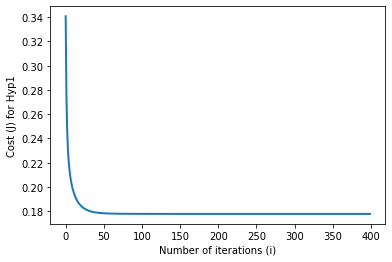

In [47]:
alpha = 0.1
num_iters = 400

# init theta and run gradient descent
m = validate.shape[1]
theta = np.zeros(m)
print(m)
theta, J_history = gradientDescentMulti(train, y_train, theta, alpha, num_iters)
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Number of iterations (i)')
plt.ylabel('Cost (J) for Hyp1')

print(str(theta))


In [48]:
train_new = np.zeros((train.shape[0],3))
    
# X = 1 + (x1) + (x1)^2 
train_new[:,0] = 1
train_new[:,1] = train[:,3]
train_new[:,2] = train[:,3] * train[:,3] 
print(train[:,3])

[ 2.76572944 -0.02166737  0.04366224 ...  0.49008127  1.19781874
 -1.07782944]


3
[-0.12489216  0.53624599  0.12057244]


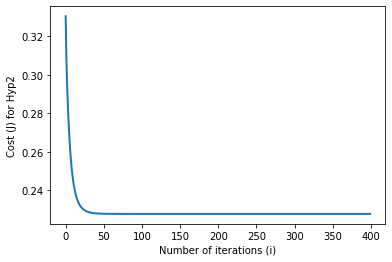

In [49]:
#####HYPOTHESIS 2#####

# init theta and run gradient descent
m = train_new.shape[1]
theta_1 = np.zeros(m)
print(m)
theta_1, J_history_1 = gradientDescentMulti(train_new, y_train, theta_1, alpha, num_iters)
plt.plot(np.arange(len(J_history_1)), J_history_1, lw=2)
plt.xlabel('Number of iterations (i)')
plt.ylabel('Cost (J) for Hyp2')

print(str(theta_1))

In [50]:
train_third = np.zeros((train.shape[0],5))
    
# X = 1 + (x1) + (x1)^2 + (x2) + (x2)^2
train_third[:,0] = 1
train_third[:,1] = train[:,3]
train_third[:,2] = train[:,3] * train[:,3] 
train_third[:,3] = train[:,1]
train_third[:,4] = train[:,1] * train[:,1] 

5
[-1.17037483e-01  5.95862255e-01  1.12852727e-01 -8.46689975e-02
 -3.10387336e-04]


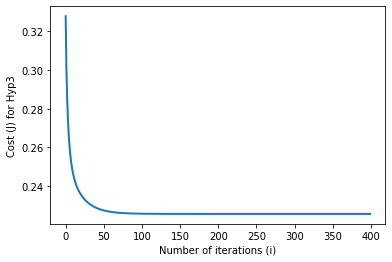

In [51]:
#####HYPOTHESIS 3#####
# init theta and run gradient descent
m = train_third.shape[1]
theta_2 = np.zeros(m)
print(m)
theta_2, J_history_2 = gradientDescentMulti(train_third, y_train, theta_2, alpha, num_iters)
plt.plot(np.arange(len(J_history_2)), J_history_2, lw=2)
plt.xlabel('Number of iterations (i)')
plt.ylabel('Cost (J) for Hyp3')

print(str(theta_2))